In [1]:
import numba
import numpy as np
from time import time
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # 10 x 10 inches plot

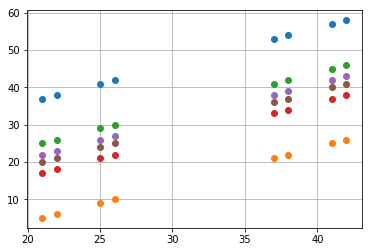

In [41]:
N = 4
x = np.arange(N**3).reshape(N, N, N)
# x
cells = []
neighbours = []
s = 0
for i in range(1, N - 1):
    for j in range(1, N - 1):
        for k in range(1, N - 1):
            cells.append(x[i, j, k])
            neighbours.append([
                  x[i + 1, j    , k    ],
                  x[i - 1, j    , k    ],
                  x[i    , j + 1, k    ],
                  x[i    , j - 1, k    ],
                  x[i    , j    , k + 1],
                  x[i    , j    , k - 1]
            ])
            
cells = np.ones_like(np.array(neighbours)) * np.array(cells).reshape(-1,1)
# neighbours
# neighbours
plt.plot(cells, neighbours, 'o')
plt.grid()
plt.show()

In [109]:
cells.T[0]
# cells[:10]
# neighbours

array([21, 22, 25, 26, 37, 38, 41, 42])

In [110]:
x

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31]],

       [[32, 33, 34, 35],
        [36, 37, 38, 39],
        [40, 41, 42, 43],
        [44, 45, 46, 47]],

       [[48, 49, 50, 51],
        [52, 53, 54, 55],
        [56, 57, 58, 59],
        [60, 61, 62, 63]]])

In [112]:
x[1:-1, 1:-1, 1:-1].flatten()

array([21, 22, 25, 26, 37, 38, 41, 42])

In [111]:
neighbours

[[37, 5, 25, 17, 22, 20],
 [38, 6, 26, 18, 23, 21],
 [41, 9, 29, 21, 26, 24],
 [42, 10, 30, 22, 27, 25],
 [53, 21, 41, 33, 38, 36],
 [54, 22, 42, 34, 39, 37],
 [57, 25, 45, 37, 42, 40],
 [58, 26, 46, 38, 43, 41]]

In [116]:
flat_x     = np.arange(N**3)
flat_cells = x[1:-1, 1:-1, 1:-1].flatten() # one line formula for cells

c1 = flat_cells[0]
n1 = c1 + [-1, 1, -N, N, -N**2, N**2]
n1

array([20, 22, 17, 25,  5, 37])

In [118]:
flat_x[n1]

array([20, 22, 17, 25,  5, 37])

# Notes
короче `cells` не сложно получить - это просто `x[1:-1, 1:-1, 1:-1].flatten()`

теперь как получить `neighbours(cell)`

короче $\pm 1, \pm N, \pm N^2$

Только момент нужно проверить в будущем - у меня же там по одной оси не 512 а 460 - там эти формулы будут ли работать? Ну вообще по моему будут.

Ну написать тест - типа проверяется тройным циклом и `unrolled` - и ответ должен совпасть.

In [11]:
np.array([-1, 1, -3, 3, -9, 9])

array([-1,  1, -3,  3, -9,  9])

In [15]:
np.arange(10).reshape(10,1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [21]:
np.array([-1, 1, -3, 3, -9, 9]) + np.arange(10).reshape(-1, 1) # -1 here: length of array 

array([[-1,  1, -3,  3, -9,  9],
       [ 0,  2, -2,  4, -8, 10],
       [ 1,  3, -1,  5, -7, 11],
       [ 2,  4,  0,  6, -6, 12],
       [ 3,  5,  1,  7, -5, 13],
       [ 4,  6,  2,  8, -4, 14],
       [ 5,  7,  3,  9, -3, 15],
       [ 6,  8,  4, 10, -2, 16],
       [ 7,  9,  5, 11, -1, 17],
       [ 8, 10,  6, 12,  0, 18]])

In [20]:
np.array([-1, 1, -3, 3, -9, 9]).T + np.arange(10)

ValueError: operands could not be broadcast together with shapes (6,) (10,) 

In [33]:
neighbours_indexes = np.array([-1, 1, -3, 3, -9, 9]) + np.arange(8).reshape(-1, 1) # -1 here: length of array 
np.sum(neighbours_indexes, axis=1)

array([ 0,  6, 12, 18, 24, 30, 36, 42])

In [37]:
N = 4
x = np.arange(N**3).reshape(N, N, N)
flat_x     = np.arange(N**3)
flat_cells = x[1:-1, 1:-1, 1:-1].flatten() # one line formula for cells
x[1:-1, 1:-1, 1:-1] = np.sum(neighbours_indexes, axis=1).reshape(N - 2, N - 2, N - 2)
x

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20,  0,  6, 23],
        [24, 12, 18, 27],
        [28, 29, 30, 31]],

       [[32, 33, 34, 35],
        [36, 24, 30, 39],
        [40, 36, 42, 43],
        [44, 45, 46, 47]],

       [[48, 49, 50, 51],
        [52, 53, 54, 55],
        [56, 57, 58, 59],
        [60, 61, 62, 63]]])

---
# Neighbours with distance 2

[[158  14  98  74  88  84]
 [159  15  99  75  89  85]
 [164  20 104  80  94  90]
 [165  21 105  81  95  91]
 [194  50 134 110 124 120]
 [195  51 135 111 125 121]
 [200  56 140 116 130 126]
 [201  57 141 117 131 127]]


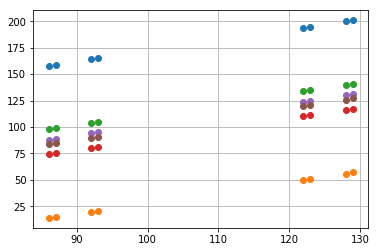

In [54]:
N = 6
x = np.arange(N**3).reshape(N, N, N)
# x
cells = []
neighbours = []
s = 0
for i in range(2, N - 2):
    for j in range(2, N - 2):
        for k in range(2, N - 2):
            cells.append(x[i, j, k])
            neighbours.append([
                  x[i + 2, j    , k    ],
                  x[i - 2, j    , k    ],
                  x[i    , j + 2, k    ],
                  x[i    , j - 2, k    ],
                  x[i    , j    , k + 2],
                  x[i    , j    , k - 2]
            ])
            
cells
cells = np.ones_like(np.array(neighbours)) * np.array(cells).reshape(-1,1)
print(np.array(neighbours))
plt.plot(cells, neighbours, 'o')
plt.grid()
plt.show()

In [56]:
print(x)

[[[  0   1   2   3   4   5]
  [  6   7   8   9  10  11]
  [ 12  13  14  15  16  17]
  [ 18  19  20  21  22  23]
  [ 24  25  26  27  28  29]
  [ 30  31  32  33  34  35]]

 [[ 36  37  38  39  40  41]
  [ 42  43  44  45  46  47]
  [ 48  49  50  51  52  53]
  [ 54  55  56  57  58  59]
  [ 60  61  62  63  64  65]
  [ 66  67  68  69  70  71]]

 [[ 72  73  74  75  76  77]
  [ 78  79  80  81  82  83]
  [ 84  85  86  87  88  89]
  [ 90  91  92  93  94  95]
  [ 96  97  98  99 100 101]
  [102 103 104 105 106 107]]

 [[108 109 110 111 112 113]
  [114 115 116 117 118 119]
  [120 121 122 123 124 125]
  [126 127 128 129 130 131]
  [132 133 134 135 136 137]
  [138 139 140 141 142 143]]

 [[144 145 146 147 148 149]
  [150 151 152 153 154 155]
  [156 157 158 159 160 161]
  [162 163 164 165 166 167]
  [168 169 170 171 172 173]
  [174 175 176 177 178 179]]

 [[180 181 182 183 184 185]
  [186 187 188 189 190 191]
  [192 193 194 195 196 197]
  [198 199 200 201 202 203]
  [204 205 206 207 208 209]
  [210 211

In [82]:
cell_indeces_flat = np.arange(N**3).reshape(N, N, N)[2:-2, 2:-2, 2:-2].flatten().reshape(-1, 1)
neighbours2 = cell_indeces_flat +np.array([-1, 1, -N, N, -N**2, N**2]) * 2

print(cell_indeces_flat)
print(neighbours2)

[[ 86]
 [ 87]
 [ 92]
 [ 93]
 [122]
 [123]
 [128]
 [129]]
[[ 84  88  74  98  14 158]
 [ 85  89  75  99  15 159]
 [ 90  94  80 104  20 164]
 [ 91  95  81 105  21 165]
 [120 124 110 134  50 194]
 [121 125 111 135  51 195]
 [126 130 116 140  56 200]
 [127 131 117 141  57 201]]


In [83]:
np.arange(25).reshape(5,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [90]:
np.arange(27).reshape(3,3,3) + np.ones(3)

array([[[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.]],

       [[10., 11., 12.],
        [13., 14., 15.],
        [16., 17., 18.]],

       [[19., 20., 21.],
        [22., 23., 24.],
        [25., 26., 27.]]])

In [94]:
x

array([[[7.02206534e-01, 8.38523671e-01, 7.17996205e-01, 6.02193909e-01],
        [2.56850110e-01, 1.62417400e-01, 4.80025037e-01, 1.50804050e-01],
        [4.19287649e-01, 6.21954291e-01, 2.80151914e-01, 7.93355879e-01],
        [4.81374426e-01, 8.00723078e-01, 6.89373376e-01, 2.04089065e-01]],

       [[3.65540662e-01, 4.39668053e-02, 5.82128663e-01, 3.33243417e-01],
        [3.22320616e-01, 9.79394877e-01, 6.44226407e-01, 7.60310134e-01],
        [6.46619460e-01, 3.10820298e-01, 1.18296482e-01, 8.95047892e-01],
        [4.68020761e-01, 4.87711635e-01, 6.12684576e-01, 9.64580006e-01]],

       [[1.59028263e-01, 5.89533236e-01, 6.09116549e-01, 5.77270247e-01],
        [7.27740201e-02, 5.11710626e-01, 3.45461338e-01, 3.19359605e-01],
        [3.61627438e-01, 6.60308753e-01, 8.65847004e-04, 7.42705811e-03],
        [9.85126833e-01, 6.26061798e-02, 6.71309824e-02, 3.71823924e-01]],

       [[6.00048174e-01, 1.61157328e-01, 1.86823347e-01, 3.24627194e-01],
        [7.12486983e-02, 9.61886

In [137]:
N = 4
S = N
x = np.random.random((N, N, N))
P_p = np.random.random((N, N, N))
K2 = np.random.random((N, N, N))


In [181]:
Z = np.zeros_like(x)
for i in range(1, S - 1):
    for j in range(1, N - 1):
        for k in range(1, N - 1):
            s1 = (P_p[i + 1, j    , k    ] + \
                  P_p[i - 1, j    , k    ] + \
                  P_p[i    , j + 1, k    ] + \
                  P_p[i    , j - 1, k    ] + \
                  P_p[i    , j    , k + 1] + \
                  P_p[i    , j    , k - 1]
            )
            Z[i, j, k] += 4/3 * K2[i, j, k] * s1
print(Z)

[[[0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]

 [[0.         0.         0.         0.        ]
  [0.         2.16017478 1.4375676  0.        ]
  [0.         0.59772302 3.057222   0.        ]
  [0.         0.         0.         0.        ]]

 [[0.         0.         0.         0.        ]
  [0.         2.41067292 1.16788115 0.        ]
  [0.         1.68609793 1.66444566 0.        ]
  [0.         0.         0.         0.        ]]

 [[0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]]


In [193]:
P = np.zeros_like(x)
# P = np.arange(64).reshape(4,4,4)
# print(P)
# print(P_p)



cell_indeces_flat = np.arange(N**3).reshape(N, N, N)[1:-1, 1:-1, 1:-1].flatten().reshape(-1, 1) # vertical vector
# print(cell_indeces_flat)
neighbours1_indeces_flat = cell_indeces_flat + np.array([-1, 1, -N, N, -N**2, N**2])      # i±1 j±1 k±1 
# print(neighbours1_indeces_flat)


neighbours_cell_1 = P.flatten()[neighbours1_indeces_flat[0]]
neighbours_cell_all = P_p.flatten()[neighbours1_indeces_flat] # each row contains 6 neighbors of cell 
# print(neighbours_cell_all)
neighbours_cell_all_sum = np.sum(neighbours_cell_all, axis=1)


# print(neighbours_cell_all_sum)

# neighbours1_indeces_flat
# P.flatten()[neighbours1_indeces_flat[0]]
# P[1:-1, 1:-1, 1:-1] += 4 /  3 * K2[1:-1, 1:-1, 1:-1] * np.sum(P.flatten()[neighbours1_indeces_flat], axis=1).reshape(N - 4, N - 4, N - 4)
# P.flatten()[cell_indeces_flat] += 4/3 * K2[cell_indeces_flat] * neighbours_cell_all_sum
# print(P.flatten()[cell_indeces_flat.reshape(-1)])

# P = P.flatten()[cell_indeces_flat.reshape(-1)]
# P += neighbours_cell_all_sum
# P.flatten()[cell_indeces_flat.reshape(-1)] + neighbours_cell_all_sum
# P += (P.flatten()[cell_indeces_flat.reshape(-1)] + neighbours_cell_all_sum).reshape(N-2, N-2, N-2)
P[1:-1, 1:-1, 1:-1] += 4/3 * K2[1:-1, 1:-1, 1:-1] * (P.flatten()[cell_indeces_flat.reshape(-1)] + neighbours_cell_all_sum).reshape(N-2, N-2, N-2)
print(P)

[[[0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]

 [[0.         0.         0.         0.        ]
  [0.         2.16017478 1.4375676  0.        ]
  [0.         0.59772302 3.057222   0.        ]
  [0.         0.         0.         0.        ]]

 [[0.         0.         0.         0.        ]
  [0.         2.41067292 1.16788115 0.        ]
  [0.         1.68609793 1.66444566 0.        ]
  [0.         0.         0.         0.        ]]

 [[0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]]


In [191]:
# np.equal(Z, P)
print(Z[1,1,1], Z[1,2,1], sep='\t')
print(P[1,1,1], P[1,2,1], sep='\t')

2.1601747793671686	0.597723021540029
2.160174779367169	0.5977230215400291


In [148]:
cell_indeces_flat.reshape(-1)

array([21, 22, 25, 26, 37, 38, 41, 42])

In [161]:
f = np.zeros((4,4,4))
f

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [168]:
f[1:-1, 1:-1, 1:-1,] += np.ones((2,2))

In [169]:
f

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 4., 4., 0.],
        [0., 4., 4., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 4., 4., 0.],
        [0., 4., 4., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])